In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
def SINE1(N):
    X = np.random.rand(1,N)
    y = np.zeros((1,N))
    cutoff = 1000;
    decision_curve = np.expand_dims(.3*np.sin(np.arange(0,N)*np.pi/180)+.5,0)
    for i in range(0,int(np.ceil(N/cutoff))):
        start_idx = i*cutoff
        end_idx = (i+1)*cutoff
        if (i+1)%2 == 0:
            y[:,start_idx:end_idx] = X[:,start_idx:end_idx] < decision_curve[:,start_idx:end_idx]
        else:
            y[:,start_idx:end_idx] = X[:,start_idx:end_idx] > decision_curve[:,start_idx:end_idx]
    return X,y

In [4]:
N = 10000
X,y = SINE1(N)
X = np.concatenate((X,np.ones((1,N))))

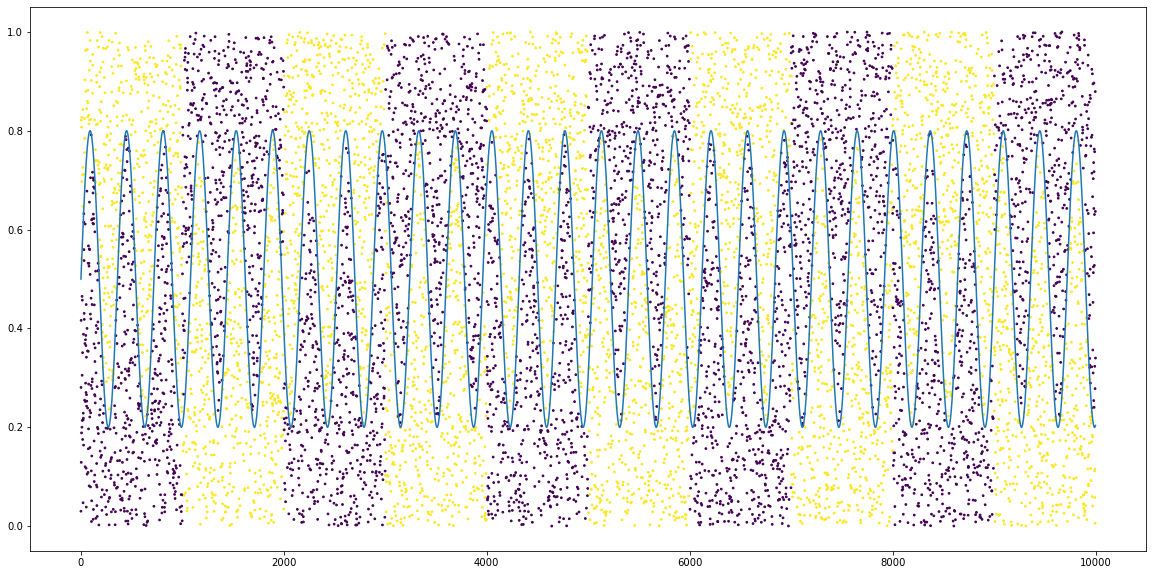

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(0,N),X[0],s=3,c=y[0])
plt.plot(np.arange(0,N),.3*np.sin(np.arange(0,N)*np.pi/180)+.5)
plt.show()

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,1)
            
    def forward(self,x):
        x = F.sigmoid(self.fc1(x))
        return F.sigmoid(self.fc2(x))

In [7]:
learning_rate = 0.05
model_old = Net().cuda()
criterion_old = nn.BCELoss()
optimizer_old = optim.Adam(
    model_old.parameters(), lr=learning_rate, weight_decay=1e-5)

In [8]:
model_new = Net().cuda()
criterion_new = nn.BCELoss()
optimizer_new = optim.Adam(
    model_new.parameters(), lr=learning_rate, weight_decay=1e-5)

In [9]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        print(m.__class__.__name__)
        torch.nn.init.xavier_normal_(m.weight)

In [10]:
X_ = torch.FloatTensor(X).permute(1,0).cuda()
y_ = torch.FloatTensor(y).permute(1,0).cuda()
dataset = torch.utils.data.TensorDataset(X_,y_.squeeze())

i = 1
incorrect = 0
min_p_mean = 1
min_p_std = 1

ps = []
detections = []
for j,(xi,yi) in enumerate(dataset):    
    y_pred = model_old(xi.unsqueeze(0))
    
    prediction = (y_pred.detach().cpu()>.5).float().squeeze() != yi.cpu()
    incorrect =  incorrect + prediction.numpy().astype(np.int).item()
    p_mean = incorrect/i
    p_std = np.sqrt(p_mean*(1-p_mean)/i)
    ps.append(p_mean)
    if i > 50:
        if (p_mean+p_std) < (min_p_mean+min_p_std):
            min_p_mean = p_mean
            min_p_std = p_std
        
        if (p_mean + p_std) > (min_p_mean + 3*min_p_std):
            print("Detected Drift",j)
            print("Minimum p={}".format(min_p_mean))
            min_p_mean = 1
            min_p_std = 1
            incorrect = 0
            model_old.load_state_dict(model_new.state_dict())
            model_new = Net().cuda()
            i = 0
            detections.append(j)
            
        elif (p_mean + p_std) > (min_p_mean + 2*min_p_std):
            output = model_new(xi.unsqueeze(0))
            loss = criterion_new(output.squeeze(),yi)
            optimizer_new.zero_grad()
            loss.backward()
            optimizer_new.step()
            print("Drift Warning",j)
    
    loss = criterion_old(y_pred.squeeze(),yi)
    optimizer_old.zero_grad()
    loss.backward()
    optimizer_old.step()
    
    i += 1

C:\Users\lpott\anaconda3\envs\NLP\lib\site-packages\torch\nn\functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Drift Warning 180
Drift Warning 181
Drift Warning 182
Drift Warning 183
Drift Warning 184
Drift Warning 185
Drift Warning 186
Drift Warning 187
Drift Warning 188
Drift Warning 189
Drift Warning 190
Drift Warning 191
Drift Warning 192
Drift Warning 193
Drift Warning 194
Drift Warning 195
Drift Warning 196
Drift Warning 197
Drift Warning 198
Drift Warning 199
Drift Warning 200
Drift Warning 201
Drift Warning 202
Drift Warning 203
Drift Warning 204
Drift Warning 205
Drift Warning 206
Drift Warning 207
Drift Warning 208
Drift Warning 209
Drift Warning 210
Drift Warning 211
Drift Warning 212
Drift Warning 213
Drift Warning 214
Drift Warning 215
Drift Warning 216
Drift Warning 217
Drift Warning 218
Drift Warning 219
Drift Warning 220
Drift Warning 221
Drift Warning 222
Drift Warning 223
Drift Warning 224
Drift Warning 225
Drift Warning 226
Drift Warning 227
Drift Warning 228
Drift Warning 1010
Drift Warning 1011
Drift Warning 1012
Drift Warning 1013
Drift Warning 1014
Drift Warning 1015
Drif

Drift Warning 6315
Drift Warning 6316
Drift Warning 6317
Drift Warning 6318
Drift Warning 7015
Drift Warning 7016
Drift Warning 7017
Drift Warning 7018
Drift Warning 7019
Drift Warning 7020
Drift Warning 7021
Drift Warning 7022
Drift Warning 7023
Drift Warning 7024
Drift Warning 7025
Drift Warning 7026
Drift Warning 7027
Drift Warning 7028
Drift Warning 7029
Drift Warning 7030
Drift Warning 7031
Drift Warning 7032
Drift Warning 7033
Drift Warning 7034
Drift Warning 7035
Drift Warning 7036
Drift Warning 7037
Drift Warning 7038
Drift Warning 7039
Drift Warning 7040
Drift Warning 7041
Drift Warning 7042
Drift Warning 7043
Drift Warning 7044
Drift Warning 7045
Drift Warning 7046
Drift Warning 7047
Drift Warning 7048
Drift Warning 7049
Drift Warning 7050
Drift Warning 7051
Drift Warning 7052
Drift Warning 7053
Drift Warning 7054
Drift Warning 7055
Drift Warning 7056
Drift Warning 7057
Drift Warning 7058
Drift Warning 7059
Drift Warning 7060
Drift Warning 7061
Drift Warning 7062
Drift Warnin

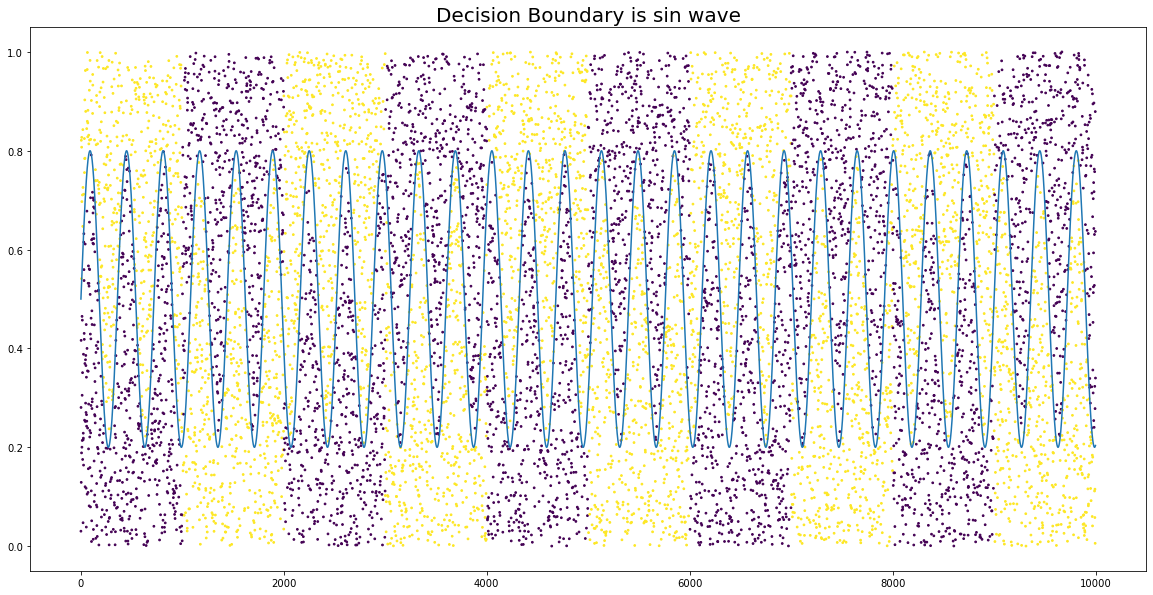

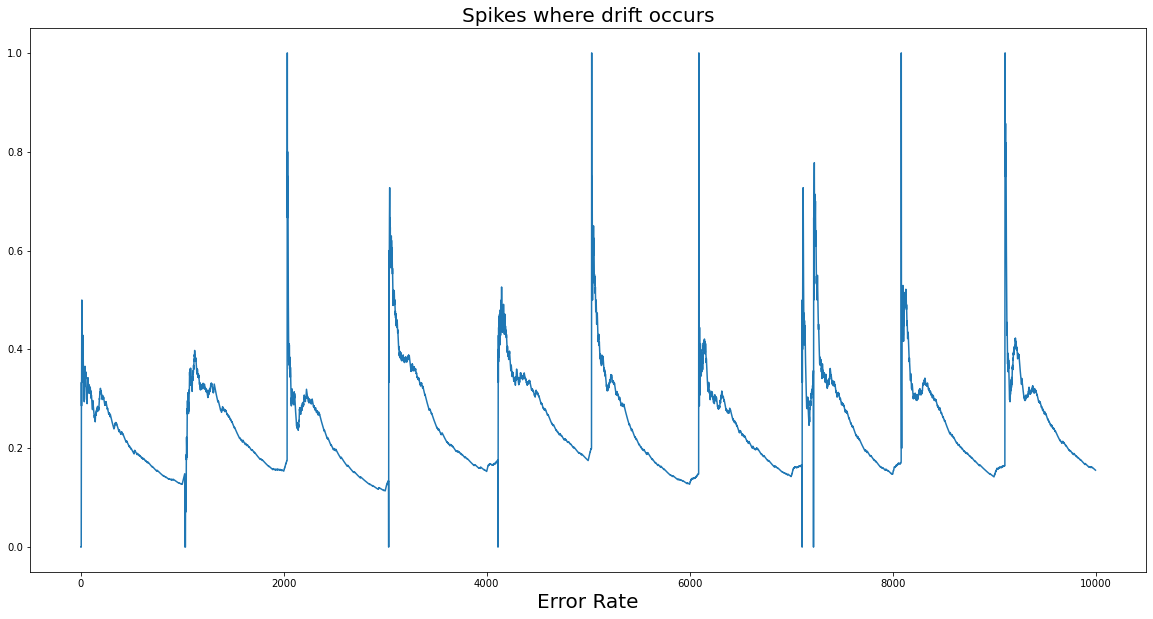

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(np.arange(0,N),X[0],s=3,c=y[0])
plt.plot(np.arange(0,N),.3*np.sin(np.arange(0,N)*np.pi/180)+.5)
plt.title("Decision Boundary is sin wave",fontsize=20)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ps)
plt.xlabel("Error Rate",fontsize=20)
plt.title("Spikes where drift occurs",fontsize=20)
plt.show()